In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from scipy.stats import anderson
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from scipy.stats import boxcox

In [ ]:
df = pd.read_csv(r'/content/sample_data/RETO_DS_AS.csv')

Analisis de variables, y ajustes de las mismas

In [ ]:
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,9000.000000,9000,9000,9000,9000,9000.000000,9000,9000,9000,9000.000000,9000,9000.000000,9000.000000,9000.000000,9000.000000,9000,9000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,1999,5124,4486,8865,NaN,4564,7820,6438,NaN,2361,NaN,NaN,NaN,NaN,6783,5213
mean,41.090556,NaN,NaN,NaN,NaN,1482.262778,NaN,NaN,NaN,15.619556,NaN,353.832778,2.520111,50.511333,0.788889,NaN,NaN
std,11.664253,NaN,NaN,NaN,NaN,3031.013197,NaN,NaN,NaN,8.345305,NaN,336.945158,2.737758,107.691963,2.210273,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-3058.000000,NaN,NaN,NaN,1.000000,NaN,3.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,109.000000,NaN,NaN,NaN,8.000000,NaN,131.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,519.000000,NaN,NaN,NaN,15.000000,NaN,240.500000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1646.500000,NaN,NaN,NaN,21.000000,NaN,462.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


AndersonResult(statistic=np.float64(519.6024063264776), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(353.8327777777778), scale=np.float64(336.9451576493028))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

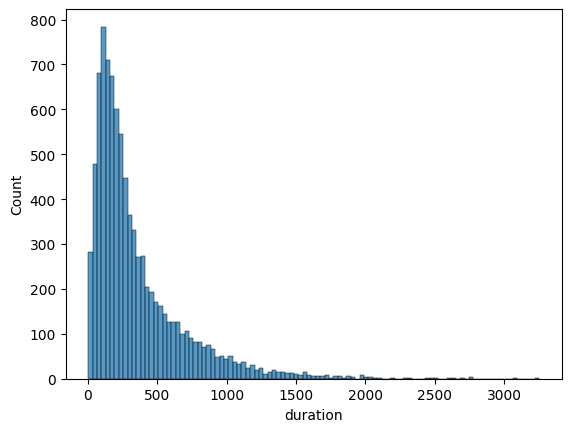

In [ ]:
sns.histplot(df['duration'])
anderson(df['duration'])

AndersonResult(statistic=np.float64(1057.194616735851), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(2.520111111111111), scale=np.float64(2.7377577038748613))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

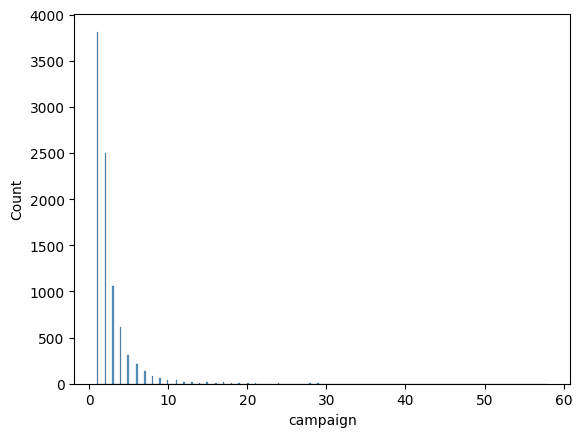

In [ ]:
sns.histplot(df['campaign'])
anderson(df['campaign'])

AndersonResult(statistic=np.float64(1805.736302977013), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(50.51133333333333), scale=np.float64(107.69196318045314))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

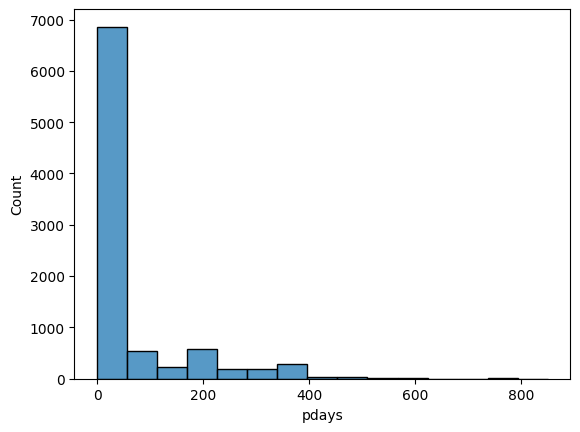

In [ ]:
sns.histplot(df['pdays'])
anderson(df['pdays'])

AndersonResult(statistic=np.float64(1846.0875491232437), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(0.7888888888888889), scale=np.float64(2.2102733414955793))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

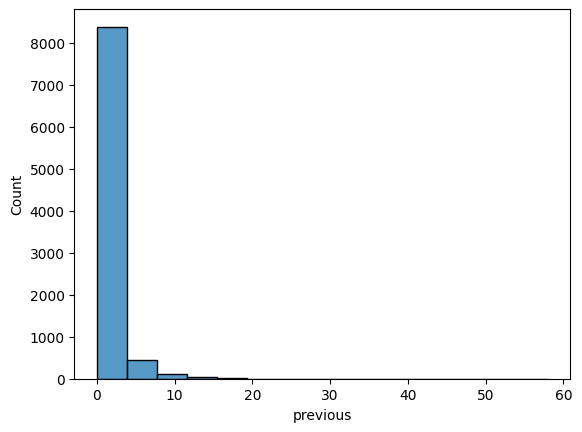

In [ ]:
sns.histplot(df['previous'])
anderson(df['previous'])

AndersonResult(statistic=np.float64(80.18457570332066), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(15.619555555555555), scale=np.float64(8.34530475000157))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

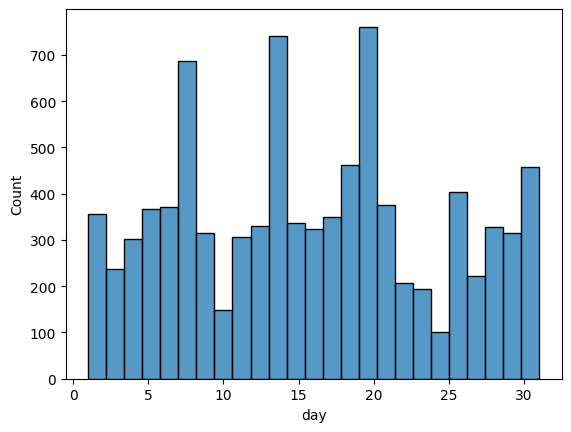

In [ ]:
sns.histplot(df['day'])
anderson(df['day'])

AndersonResult(statistic=np.float64(118.1611565311614), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(41.090555555555554), scale=np.float64(11.66425333147774))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

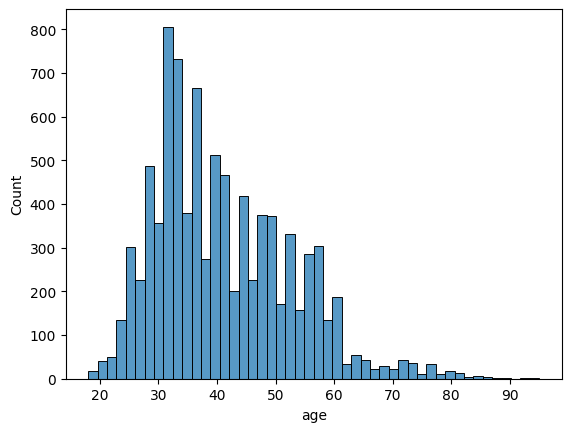

In [ ]:
sns.histplot(df['age'])
anderson(df['age'])

Del analisis de forma anterior observamos que las unicas variables numericas con sentido al ser aproximadas a una forma gaussiana son duration y tambien age, esto se sabe pues ademas de la forma del grafico estas se pueden considerar relativamente continuas, lo que permite la aproximacion gaussiana.

Para 'job', 'marital', 'contact', 'month', 'poutcome' se utilizara el proceso de OneHotEncoder debido a que no guardan una caracteriztica ordinal, mientras que para 'default', 'housing', 'loan', 'y' se permite el uso de LabelEncoder, pues en varias de estas se tienen clases tales como yes o no, lo cual puede ser transformado sin problemas, ademas, para 'education' se realizo un diccionario para salvaguardar el orden de los datos, pues este es el unico de los casos que si guarda un orden ordinal.


AndersonResult(statistic=np.float64(15.276149806364629), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(5.460379313925911), scale=np.float64(0.9637635712666065))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

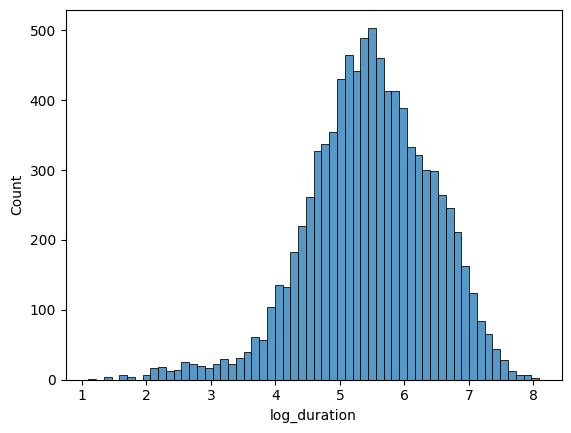

In [ ]:
df['log_duration'] = np.log(df['duration'])
sns.histplot(df['log_duration'])
anderson(df['log_duration'])

Lambda: -0.2434125507018051


AndersonResult(statistic=np.float64(28.641312247989845), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(2.4260241090711374), scale=np.float64(0.11228300855529594))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

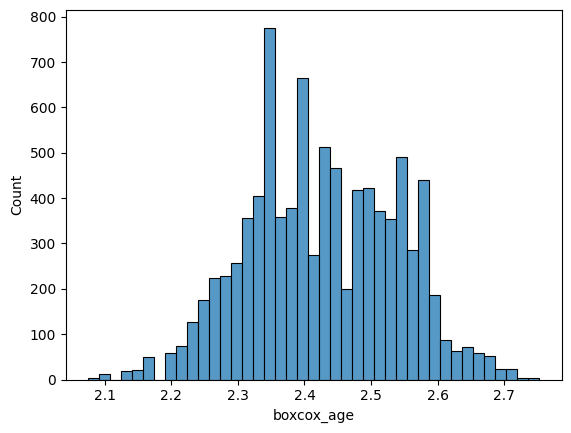

In [ ]:
df['boxcox_age'], lambda_bc = boxcox(df['age'])
print("Lambda:", lambda_bc)
sns.histplot(df['boxcox_age'])
anderson(df['boxcox_age'])

In [ ]:
LE = LabelEncoder()

orden = {'tertiary' : 3, 'unknown' : 0, 'secondary' : 2, 'primary' : 1}
df['education'] = df['education'].map(orden)

df['default'] = LE.fit_transform(df['default'])
df['housing'] = LE.fit_transform(df['housing'])
df['loan'] = LE.fit_transform(df['loan'])
df['y'] = LE.fit_transform(df['y'])

cols = ['job', 'marital', 'contact', 'month', 'poutcome']

for i in cols:
  OHN = OneHotEncoder(sparse_output=False)
  codificado = OHN.fit_transform(df[[i]])


  OHN_df = pd.DataFrame(
                        codificado,
                        columns = OHN.get_feature_names_out([i])
                        )


  df = pd.concat([df, OHN_df], axis=1).drop(columns=[i])

In [ ]:
objetivo = df['y']

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.drop('y', axis=1))

In [ ]:
df

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,31,3,0,2666,0,0,10,318,2,97,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,29,0,0,1584,0,0,6,245,1,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,41,2,0,2152,1,0,17,369,1,-1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,50,2,0,84,1,0,17,18,8,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40,2,0,0,0,0,28,496,2,182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,42,2,0,314,1,1,16,269,2,-1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8996,32,2,0,491,1,0,8,223,2,-1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8997,44,2,0,2886,0,0,20,31,1,-1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8998,57,1,0,491,1,0,15,1217,3,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test_size = 0.20
val_size = 0.20

X_train_full, X_test, y_train_full, y_test = train_test_split(
                                                              df_scaled, objetivo, test_size = test_size,
                                                              random_state = 42, stratify = objetivo
                                                              )


X_train, X_val, y_train, y_val = train_test_split(
                                                  X_train_full, y_train_full,
                                                  test_size = val_size / (1 - test_size),
                                                  random_state = 42,
                                                  stratify = y_train_full)


pipe = Pipeline([
    ("kbest", SelectKBest(score_func=f_classif)),
    ("model", LogisticRegression())
])


param_grid = [
    {
        "model": [LogisticRegression(max_iter=500)],
        "model__C": [0.001, 0.01, 0.1, 1, 10],
        "model__penalty": ["l2"],
        "kbest__k": [5,10,15,20,25,'all']
    },

    {
        "model": [MLPClassifier(max_iter=1000)],
        "model__hidden_layer_sizes": [(50,), (100,), (50,50)],
        "model__alpha": [0.0001, 0.001, 0.01],
        "model__learning_rate_init": [0.001, 0.01],
        "kbest__k": [5,10,15,20,25,'all']
    }
]

grid = GridSearchCV(
                    estimator = pipe,
                    param_grid = param_grid,
                    scoring = "f1",
                    n_jobs = -1
                    )

grid.fit(X_train, y_train)

print("MEJOR MODELO ENCONTRADO\n")
print(grid.best_estimator_)
print("\nMejores hiperparámetros:")
print(grid.best_params_)

best_model = grid.best_estimator_

y_pred_val = best_model.predict(X_val)
print("\nVal")
print("Accuracy:", accuracy_score(y_val, y_pred_val))
print("Precision:", precision_score(y_val, y_pred_val))
print("Recall:", recall_score(y_val, y_pred_val))
print("F1 Score:", f1_score(y_val, y_pred_val))
print("\nReporte de clasificación:\n")
print(classification_report(y_val, y_pred_val))

y_pred_test = best_model.predict(X_test)

print("\nTest")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_test))

MEJOR MODELO ENCONTRADO

Pipeline(steps=[('kbest', SelectKBest(k=20)),
                ('model',
                 MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000))])

Mejores hiperparámetros:
{'kbest__k': 20, 'model': MLPClassifier(max_iter=1000), 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (50,), 'model__learning_rate_init': 0.001}

Val
Accuracy: 0.8255555555555556
Precision: 0.7991913746630728
Recall: 0.7823218997361477
F1 Score: 0.7906666666666666

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1042
           1       0.80      0.78      0.79       758

    accuracy                           0.83      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.83      0.83      0.83      1800


Test
Accuracy: 0.8355555555555556
Precision: 0.8005215123859192
Recall: 0.8110964332892999
F1 Score: 0.8057742782152231

Reporte de clasificación:

              precision   

In [ ]:
test_size = 0.20
val_size = 0.20

X_train_full, X_test, y_train_full, y_test = train_test_split(
                                                              df_scaled, objetivo, test_size = test_size,
                                                              random_state = 42, stratify = objetivo
                                                              )


X_train, X_val, y_train, y_val = train_test_split(
                                                  X_train_full, y_train_full,
                                                  test_size = val_size / (1 - test_size),
                                                  random_state = 42,
                                                  stratify = y_train_full)


pipe = Pipeline([
    ("kbest", SelectKBest(score_func=f_classif)),
    ("model", LogisticRegression())
])


param_grid = [
    {
        "model": [LogisticRegression(max_iter=500)],
        "model__C": [0.001, 0.01, 0.1, 1, 10],
        "model__penalty": ["l2"],
        "kbest__k": [5,10,15,20,25,'all']
    }
]

grid = GridSearchCV(
                    estimator = pipe,
                    param_grid = param_grid,
                    scoring = "f1",
                    n_jobs = -1
                    )

grid.fit(X_train, y_train)

print("MEJOR MODELO ENCONTRADO\n")
print(grid.best_estimator_)
print("\nMejores hiperparámetros:")
print(grid.best_params_)

best_model = grid.best_estimator_

y_pred_val = best_model.predict(X_val)
print("\nVal")
print("Accuracy:", accuracy_score(y_val, y_pred_val))
print("Precision:", precision_score(y_val, y_pred_val))
print("Recall:", recall_score(y_val, y_pred_val))
print("F1 Score:", f1_score(y_val, y_pred_val))
print("\nReporte de clasificación:\n")
print(classification_report(y_val, y_pred_val))

y_pred_test = best_model.predict(X_test)

print("\nTest")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_test))

MEJOR MODELO ENCONTRADO

Pipeline(steps=[('kbest', SelectKBest(k='all')),
                ('model', LogisticRegression(C=1, max_iter=500))])

Mejores hiperparámetros:
{'kbest__k': 'all', 'model': LogisticRegression(max_iter=500), 'model__C': 1, 'model__penalty': 'l2'}

Val
Accuracy: 0.82
Precision: 0.7948369565217391
Recall: 0.7717678100263852
F1 Score: 0.7831325301204819

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1042
           1       0.79      0.77      0.78       758

    accuracy                           0.82      1800
   macro avg       0.82      0.81      0.81      1800
weighted avg       0.82      0.82      0.82      1800


Test
Accuracy: 0.8272222222222222
Precision: 0.7965425531914894
Recall: 0.7912813738441216
F1 Score: 0.7939032471835653

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1043
           1

In [ ]:
test_size = 0.20
val_size = 0.20

X_train_full, X_test, y_train_full, y_test = train_test_split(
                                                              df_scaled, objetivo, test_size = test_size,
                                                              random_state = 42, stratify = objetivo
                                                              )


X_train, X_val, y_train, y_val = train_test_split(
                                                  X_train_full, y_train_full,
                                                  test_size = val_size / (1 - test_size),
                                                  random_state = 42,
                                                  stratify = y_train_full)


pipe = Pipeline([
    ("kbest", SelectKBest(score_func=f_classif)),
    ("model", MLPClassifier())
])


param_grid = [
    {
        "model": [MLPClassifier(max_iter=1000)],
        "model__hidden_layer_sizes": [(50,), (100,), (50,50)],
        "model__alpha": [0.0001, 0.001, 0.01],
        "model__learning_rate_init": [0.001, 0.01],
        "kbest__k": [5,10,15,20,25,'all']
    }
]

grid = GridSearchCV(
                    estimator = pipe,
                    param_grid = param_grid,
                    scoring = "f1",
                    n_jobs = -1
                    )

grid.fit(X_train, y_train)

print("MEJOR MODELO ENCONTRADO\n")
print(grid.best_estimator_)
print("\nMejores hiperparámetros:")
print(grid.best_params_)

best_model = grid.best_estimator_

y_pred_val = best_model.predict(X_val)
print("\nVal")
print("Accuracy:", accuracy_score(y_val, y_pred_val))
print("Precision:", precision_score(y_val, y_pred_val))
print("Recall:", recall_score(y_val, y_pred_val))
print("F1 Score:", f1_score(y_val, y_pred_val))
print("\nReporte de clasificación:\n")
print(classification_report(y_val, y_pred_val))

y_pred_test = best_model.predict(X_test)

print("\nTest")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_test))

MEJOR MODELO ENCONTRADO

Pipeline(steps=[('kbest', SelectKBest(k=15)),
                ('model',
                 MLPClassifier(alpha=0.01, hidden_layer_sizes=(50,),
                               max_iter=1000))])

Mejores hiperparámetros:
{'kbest__k': 15, 'model': MLPClassifier(max_iter=1000), 'model__alpha': 0.01, 'model__hidden_layer_sizes': (50,), 'model__learning_rate_init': 0.001}

Val
Accuracy: 0.8327777777777777
Precision: 0.7874213836477988
Recall: 0.8258575197889182
F1 Score: 0.8061815840309079

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1042
           1       0.79      0.83      0.81       758

    accuracy                           0.83      1800
   macro avg       0.83      0.83      0.83      1800
weighted avg       0.83      0.83      0.83      1800


Test
Accuracy: 0.8327777777777777
Precision: 0.7908163265306123
Recall: 0.8190224570673712
F1 Score: 0.8046722907203114

Reporte de c